# $$\color{red}{\text{Artificial Intelligence - Camputer Assignment 4}}$$

$$\color{orange}{\text{Machine Learning}}$$

$$\color{lime}{\text{Alireza Javid - 810099011}}$$

## $\color{deepskyblue}{\text{Introduction}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین با استفاده از روش های یادگیری ماشین بر اساس مجموعه داده در اختیار داده شده یک مدل برای پیش بینی داشتن دیابت را بررسی کنیم.
</font>
</p>

## $\color{deepskyblue}{\text{Import Libraries}}$

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

## $\color{deepskyblue}{\text{Data Analysis}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش به بررسی ابتدایی دیتاست داده شده می پردازیم و ویژگی های داده را با مصور سازی و ... بررسی می کنیم.
</font>
</p>

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          NaN    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0   NaN   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                       NaN  33.0        1

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ویژگی های عددی ویژگی ها را در زیر مشاهده می کنیم.
</font>
</p>

In [3]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count   635.000000   654.000000     680.000000     624.000000  680.000000   
mean      3.700787   113.422018      68.786765      20.386218   80.123529   
std       3.518126   202.816831      19.724841      15.987049  115.681140   
min     -22.000000 -5000.000000      -2.000000       0.000000    0.000000   
25%       1.000000    99.000000      62.000000       0.000000    0.000000   
50%       3.000000   117.000000      72.000000      23.000000   34.000000   
75%       6.000000   140.750000      80.000000      32.000000  129.250000   
max      17.000000   199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  684.000000                590.000000  655.000000  768.000000  
mean    32.083626                  0.466676   33.157252    0.348958  
std      7.800741                  0.322408   13.829831    0.476951  
min      0.000000                  0.078000 -150.000000    0.000000  
25%     27.375000                  0.243250   24.000000    0.000000  
50%     32.300000                  0.368000   29.000000    0.000000  
75%     36.600000                  0.611500   41.000000    1.000000  
max     67.100000                  2.329000   81.000000    1.000000

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده می شود تمام ویژگی های داده شده در دیتاست عددی می باشند. البته ویژگی outcome یک ویژگی باینری می باشد.
</font>
</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقادیر از دست رفته که محتوای Nan دارند در زیر برای هر ویژگی قابل مشاهده است.
</font>
</p>

In [5]:
df.isna().sum()

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

In [6]:
df.isna().sum()/len(df) * 100

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با رسم نمودار correlation  می توانیم میزان وابستگی هر ویژگی را به صورت دقیق تر مشاهده کنیم.
</font>
</p>

In [7]:
df.corr().style.background_gradient(cmap='coolwarm')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با رسم نمودار های زیر توزیع هر ویژگی را مشاهده کنیم و میزان شباهت آن ها به توزیع نرمال را مقایسه کنیم. همانطور که مشاهده می کنید ویژگی BMI بیشترین شباهت را به توزیع نرمال دارد.
</font>
</p>

C:\Users\hooshmand\AppData\Local\Temp\ipykernel_50940\1495899088.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i][j], color=color[k])
C:\Users\hooshmand\AppData\Local\Temp\ipykernel_50940\1495899088.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes

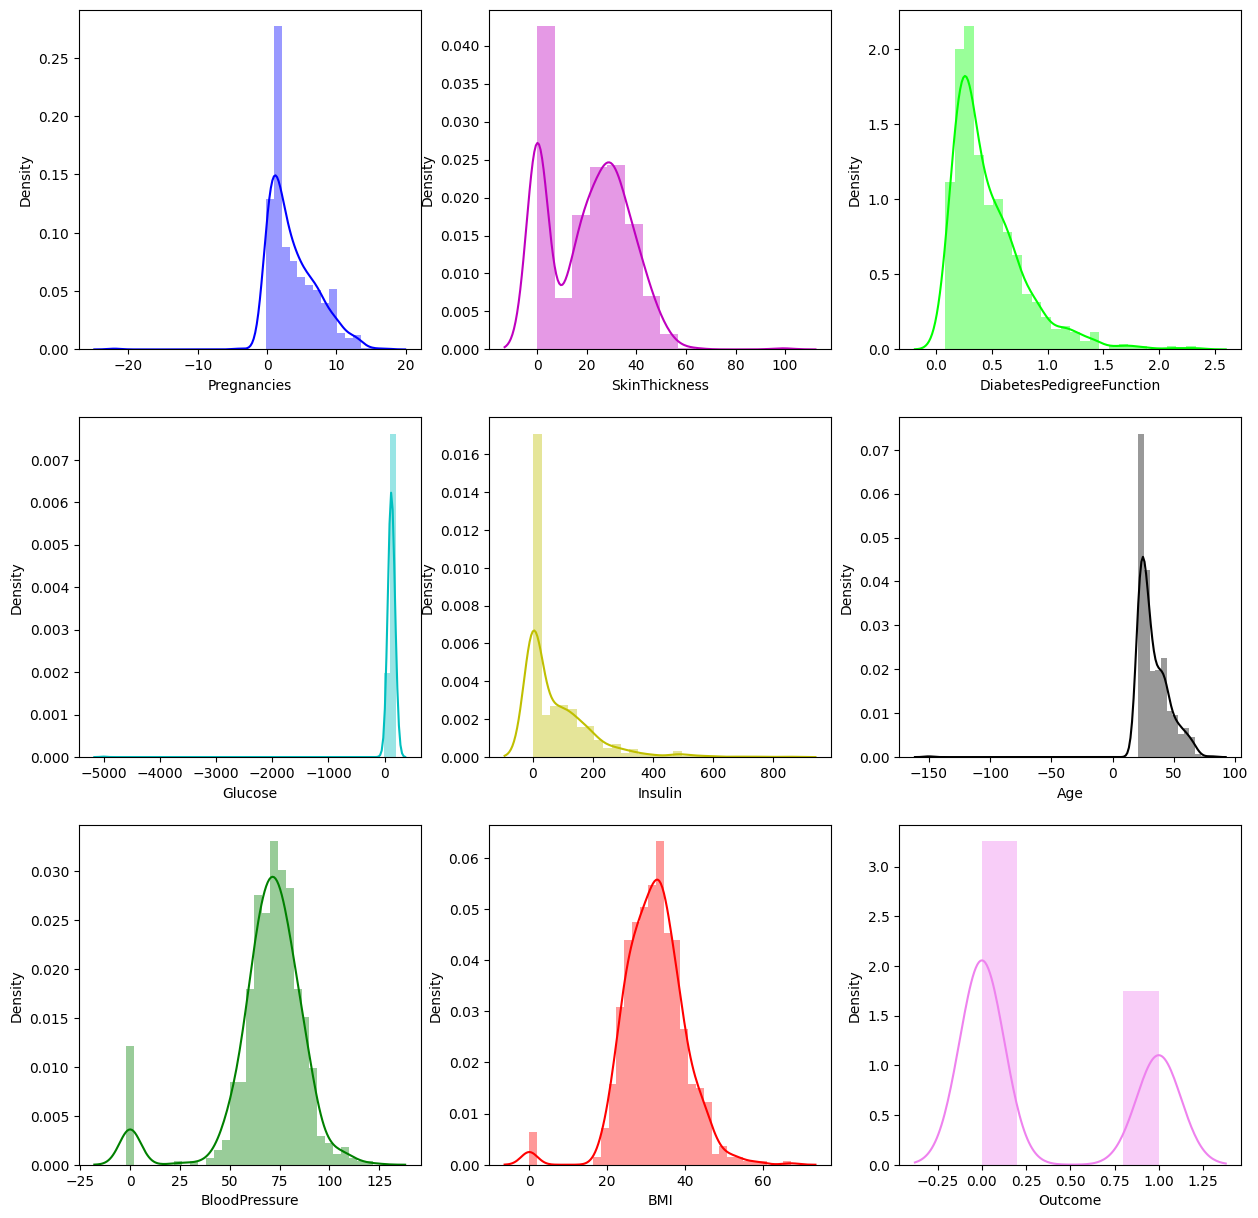

In [8]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
i, j, k = 0, 0, 0
color = ['b','c','g','m','y','r','lime','k','violet']
for  column in df.columns:
    #plt.subplot(3,3,i)
    sns.distplot(df[column], ax=axes[i][j], color=color[k])
    i +=1
    k += 1
    if i==3:
        i = 0
        j += 1
plt.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی دقیق تر ویژگی ها نمودار scatter را نیز رسم می کنیم. البته با توجه به مقادیر باینری outcome این نمودار ها چندان نمی تواند اطلاعات زیادی به ما دهد.
</font>
</p>

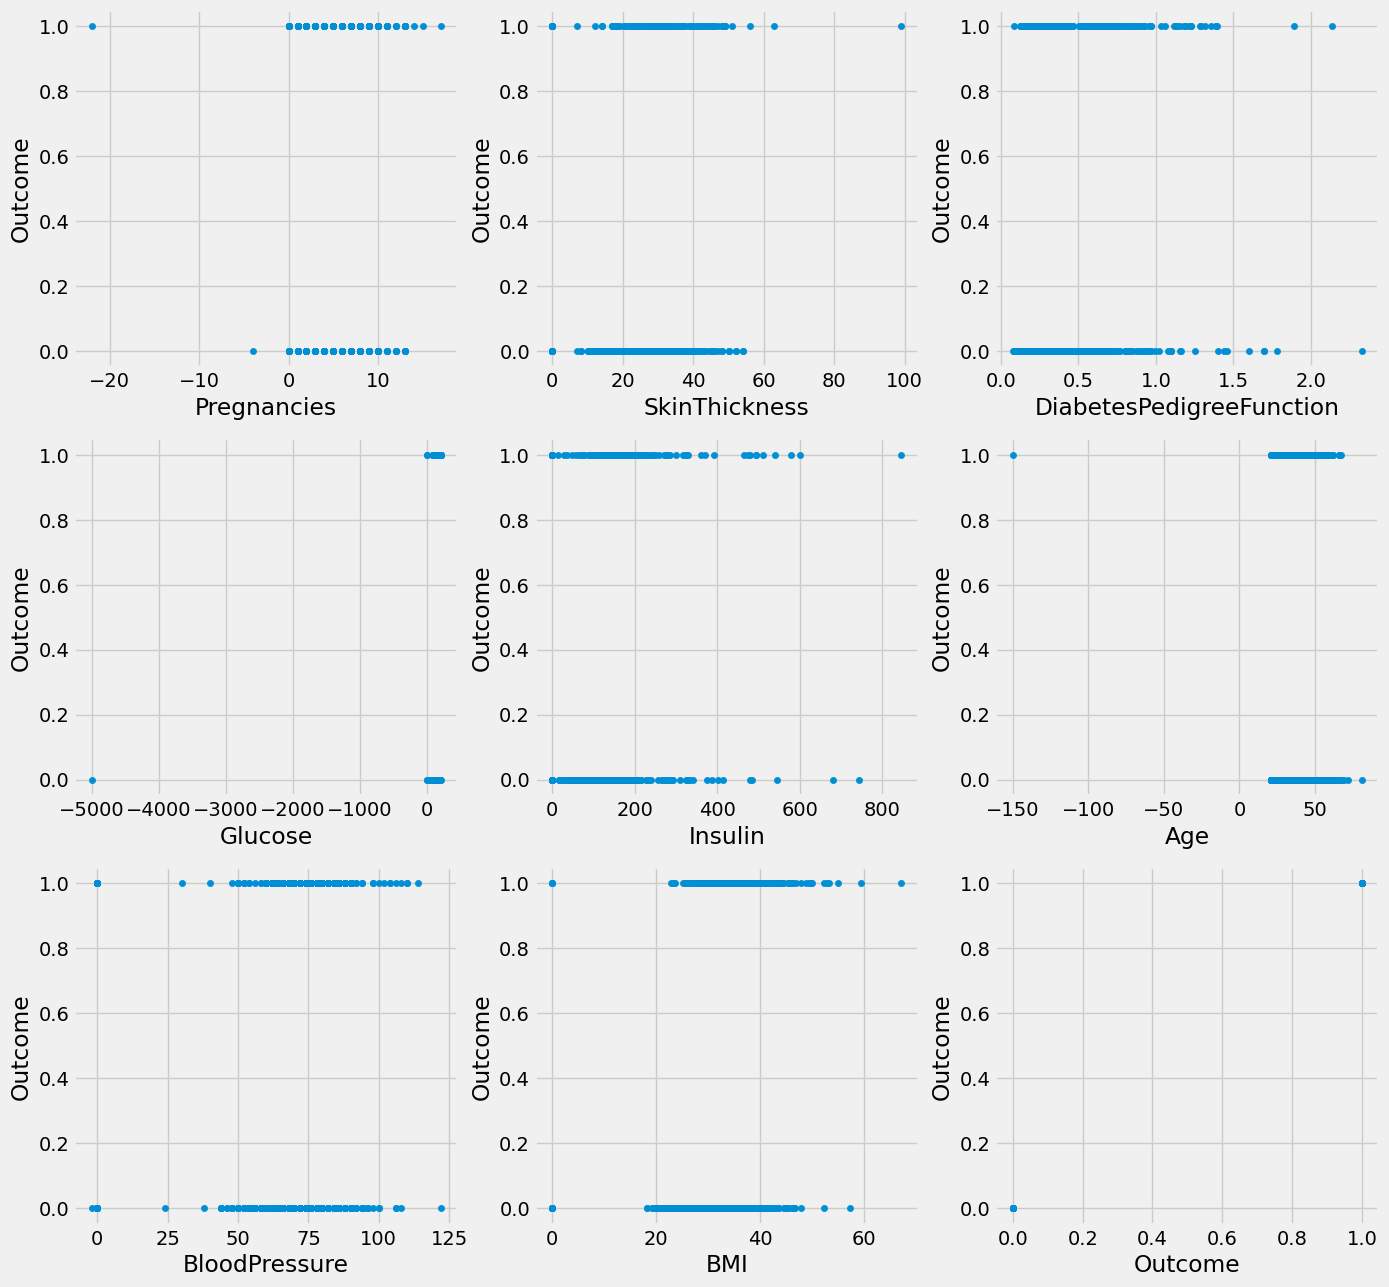

In [9]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(3,3, figsize=(15,15))
i, j, k = 0, 0, 0
color = ['b','c','g','m','y','r','lime','k','violet']
for  column in df.columns:
    #plt.subplot(3,3,i)
    df.plot(ax=axes[i][j], kind='scatter', x=column, y='Outcome')
    i +=1
    k += 1
    if i==3:
        i = 0
        j += 1
plt.show()

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
2 تست دیگر نیز برای تصویر سازی داده ها انجام می دهیم.
</p>

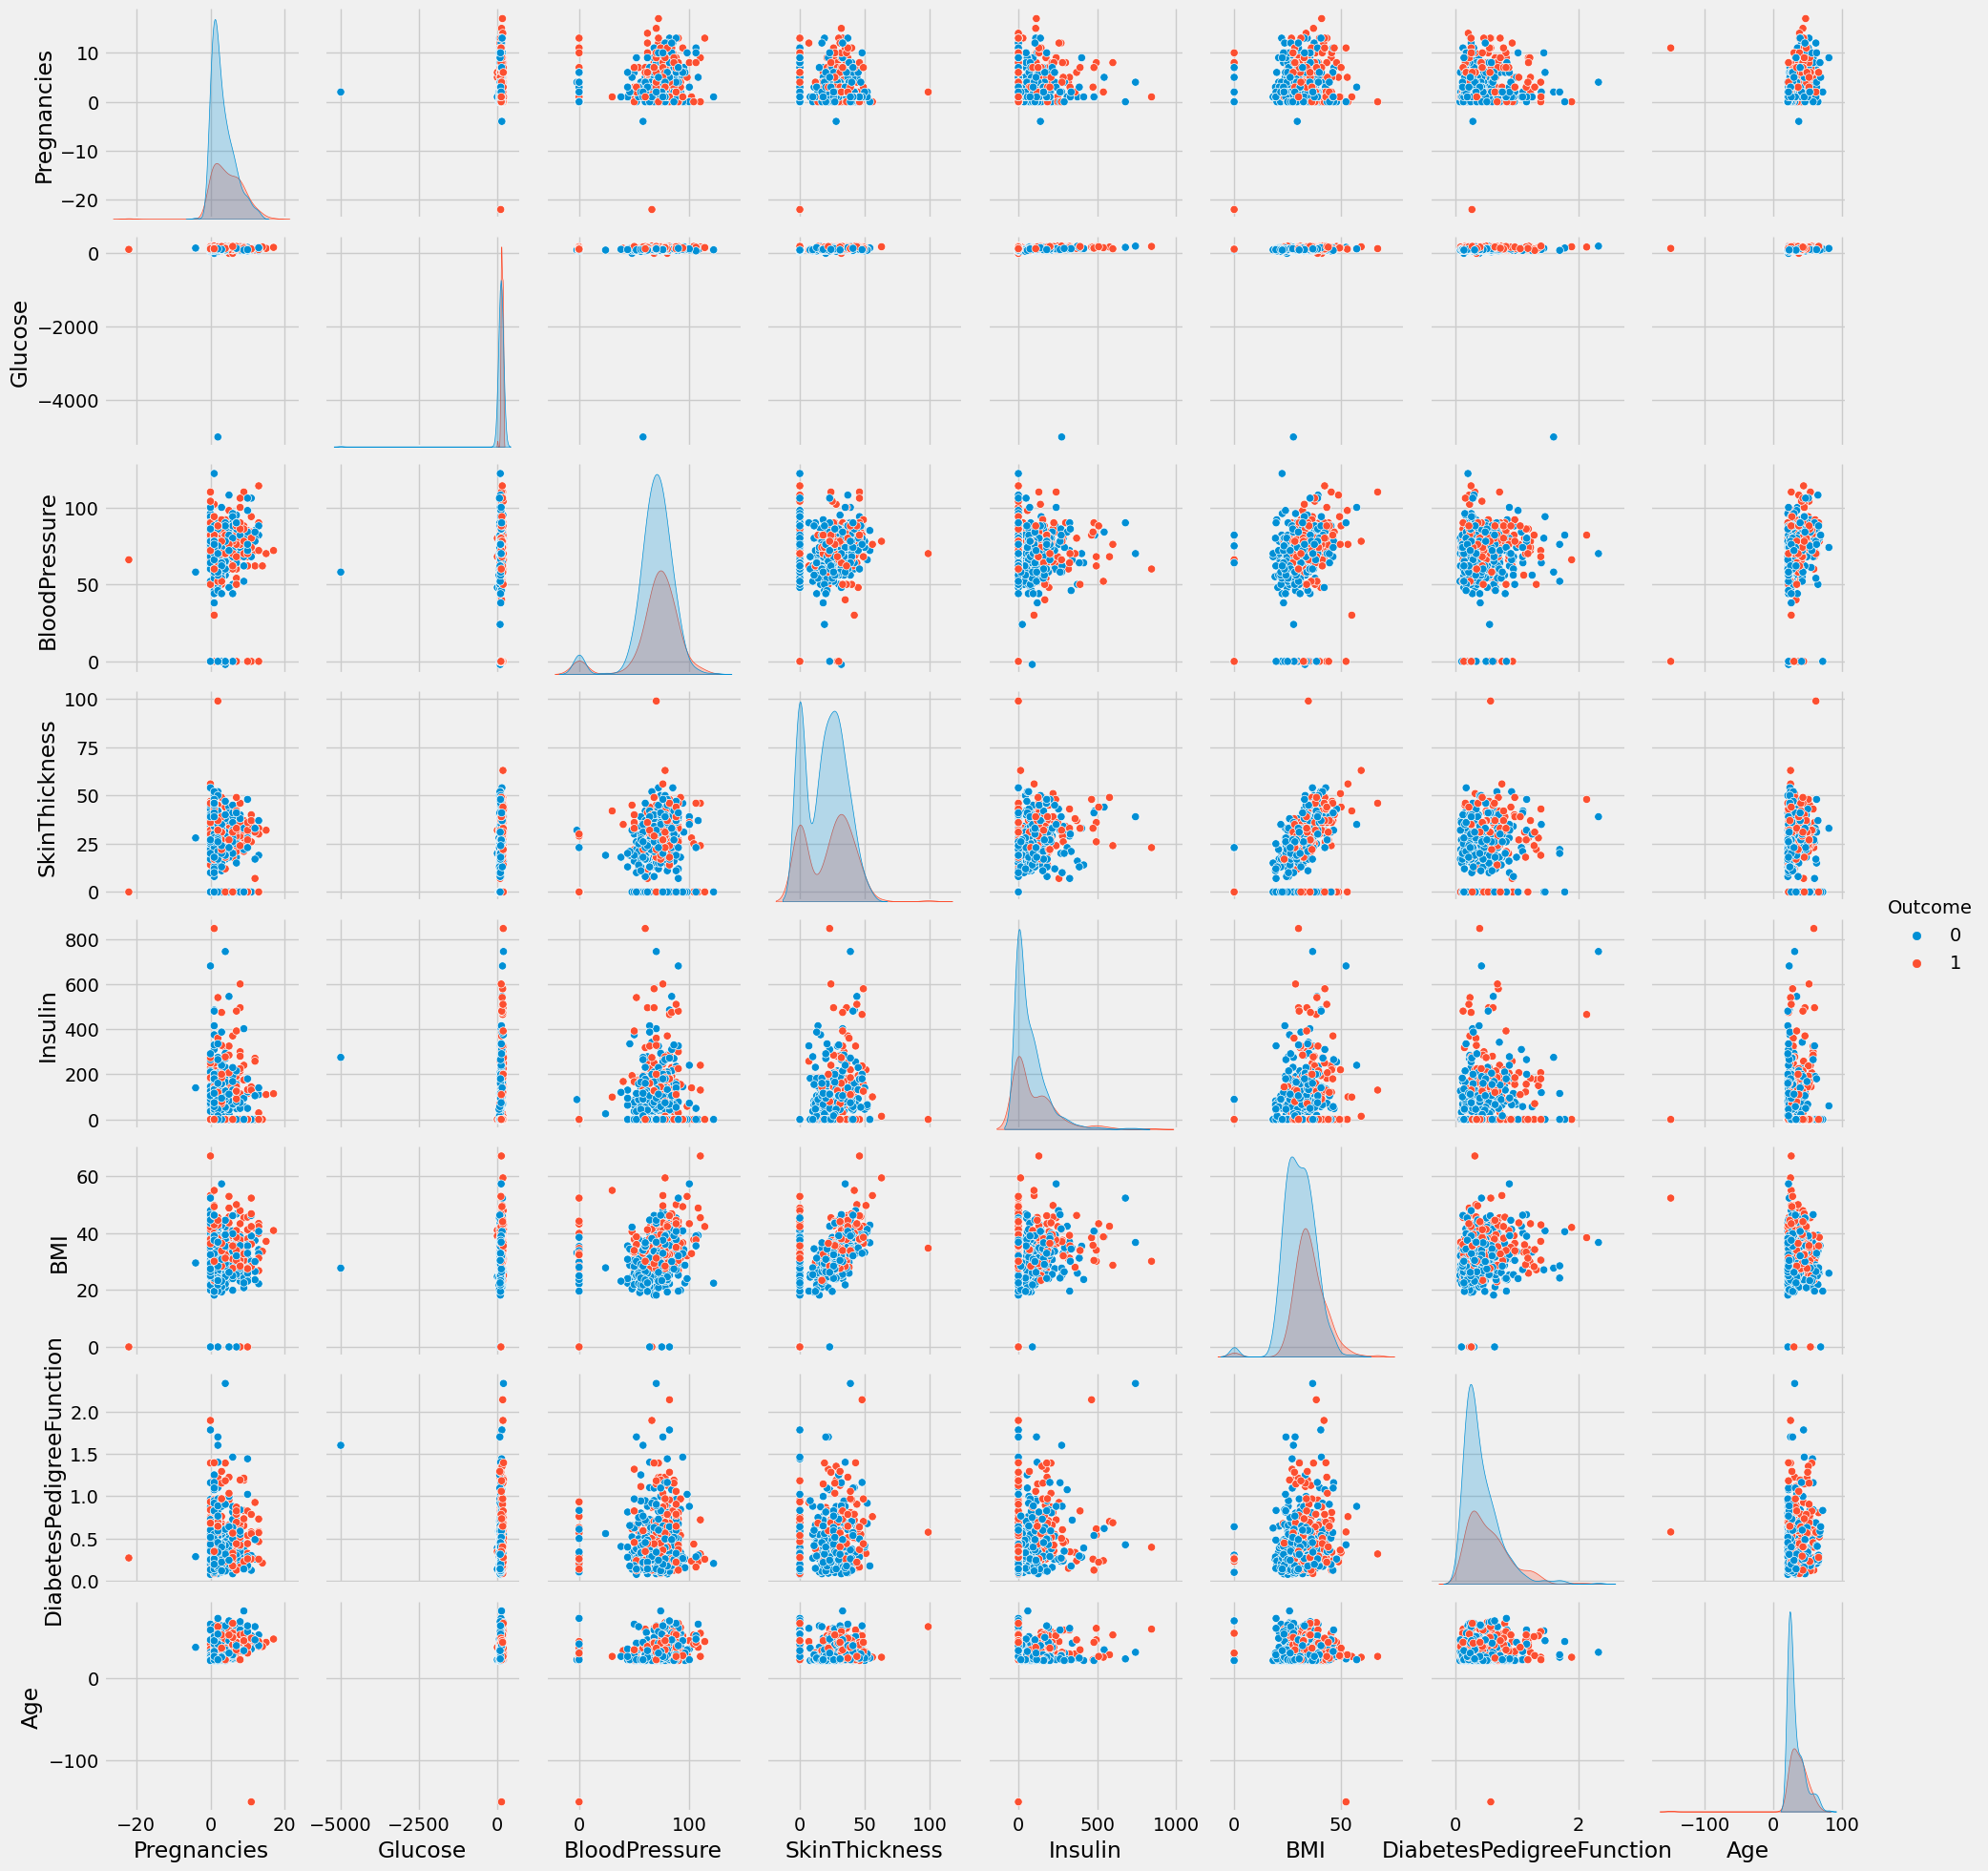

In [10]:
sns.pairplot(data = df, hue = 'Outcome')

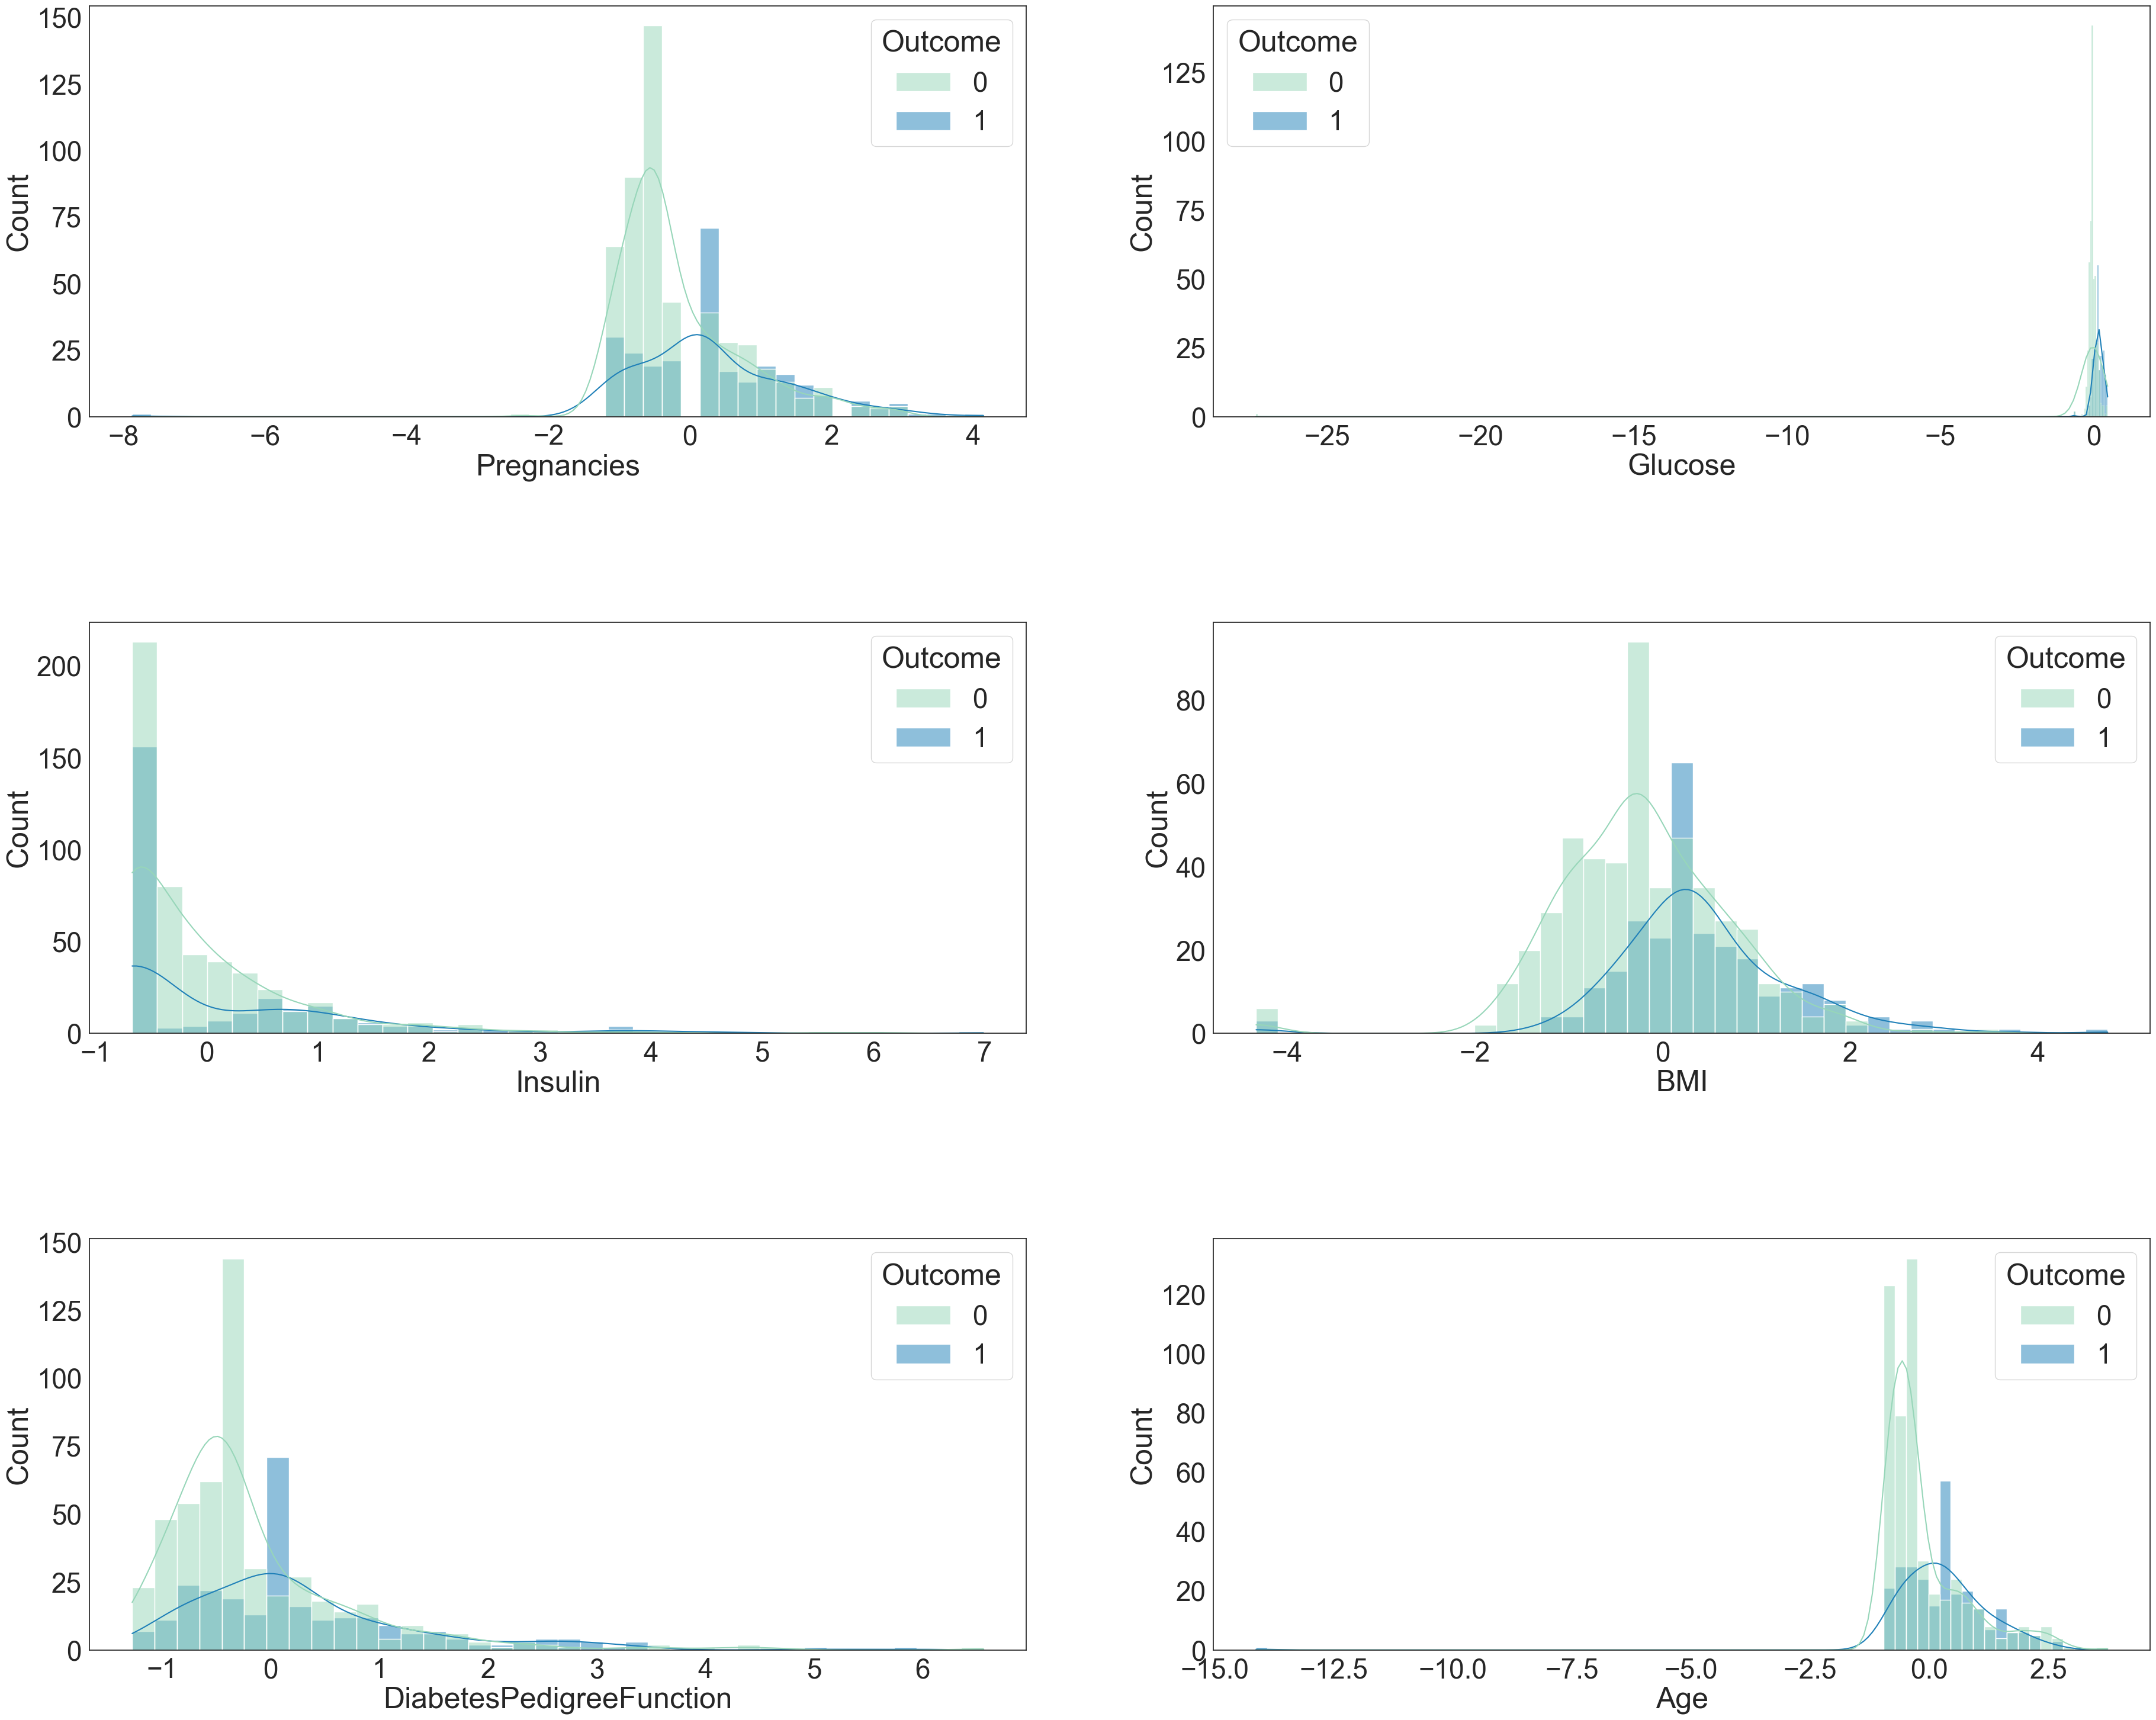

In [38]:
from matplotlib import rcParams
feature_names = [cname for cname in df.loc[:,:'Age'].columns]
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

## $\color{deepskyblue}{\text{Preprocessing}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<ul dir =rtl>
حالا به پیش پردازش داده می پردازیم. در این بخش ابتدا داده های Nan را باید هندل کنیم. ابتدا به عنوان روش های پر کردن missing value ها می پردازیم. 
<ol>
      <li>حذف سطر هایی که داده های از دست رفته زیادی دارند می تواند در برخی اوقات تصمیم درستی باشد زیرا ممکن است با جایگزین کردن داده ها با مقادیر متفاوت داده های ما بایاس شوند که مناسب نمی باشد و پایداری مدل از بین می رود اما در این روش اطلاعات زیادی دور ریخته خواهد شد که می تواند ویژگی بدی برای مدل باشد. </li>
      <li>پر کردن داده های از دست رفته با مد یا میانگین نیز روش دیگری است که می تواند به کار گرفته شود. این روش به راحتی پیاده سازی می شود که اطلاعاتی را نیز دور نمی ریزد اما می تواند باعث ایجاد بایاس و data leakageدر مسئله شود. همچنین این روش تنها با ویژگی های عددی سازگاری دارد. و </li>
      <li>Last observation carried forward (LOCF) روش دیگری می باشد که در آن آخرین داده مشاهده شده که از دست رفته نمی باشد برای پر کردن داده مورد استفاده قرار می گیرد.</li>
      <li>Backfilling data نیز روش دیگری می باشد که داده های از دست رفته در هر سطر را با داده های متناسب در سطر بعدی خود پر می کند. این روش مانند روش قبل وابسته به دیتاست می تواند بایاس زیادی را وارد مدل کند و همچنین داده ها را دارای مقادیر نامناسب کند.</li>
      <li>پیش بینی داده ها با regression یا  classification model نیز راه دیگری می باشد که می تواند مورد استفاده قرار گیرد. این روش با داده های بهتری مقادیر از دست رفته را پر می کند اما به صورت proxy برای مقادیر واقعی آنها عمل خواهد کرد.</li>
</ol>
در این مسئله ویژگی های DiabetesPedigreeFunction  و SkinThickness و Pregnancies دارای بیشترین مقادیر از دست رفته می باشد. با توجه به این موضوع و نمودار وابستگی رسم شده در بخش قبل داده های BloodPressure و SkinThickness را می توانیم دور بریزیم تا مدل بدست آمده دارای دقت بیشتری شود.
</font>
</p>

In [12]:
df.drop(['SkinThickness','BloodPressure'],axis=1,inplace=True)
#df.drop(['DiabetesPedigreeFunction'],axis=1,inplace=True)
df.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده های دیگر را با مقدار میانه جایگزین می کنیم. چون در این دیتاست مقدار مد و میانگین نمی تواند معیار خوبی باشد(با توجه به std و مقادیر 0 زیاد) و میانه پارامتر بهتری می باشد.
</font>
</p>

In [13]:
#df.apply(lambda col: col.fillna(col.mode()[0], inplace = True))
def median_target(var):   
    
    temp = df[df[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp

columns = df.columns
columns = columns.drop("Outcome")

for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با نرمالیزه کردن(Normalization) داده ها مقادیر آنها بین 1 و 0 خواهد بود.
<br>
با استاندارد سازی (Standardization) نیز با فرض داشتن توزیع نرمال یک ویژگی, آن ویژگی را به توزیع نرمال استاندارد تبدیل خواهد کرد.
<br>
در این مسئله این عمل بهتر است صورت گیرد زیرا در غیر این صورت ویژگی هایی که دارای مقادیر متریک بیشتری می باشند می تواند بر روی مدل اثر زیادی گذاشته و مدل را بایاس کند.
</font>
</p>

In [14]:
df[df.columns.drop('Outcome')] = df[df.columns.drop('Outcome')].apply(lambda col : (col - col.mean()) / col.std())
df

Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0       0.755937  0.181529 -0.669285  0.213013                  0.635591   
1      -0.786463 -0.154911 -0.669285 -0.733869                 -0.325694   
2       0.138977  0.368440 -0.669285 -1.180257                  0.792323   
3      -0.786463 -0.133550  0.182086 -0.530966                 -0.966550   
4       0.138977  0.122786  0.852315  0.307702                  0.053944   
..           ...       ...       ...       ...                       ...   
763     1.989856 -0.069466  0.961000  0.118325                 -0.421474   
764    -0.477983  0.042681 -0.669285  0.645874                 -0.364006   
765     0.447457 -0.042764  0.345115 -0.787977                 -0.694883   
766    -0.786463  0.064042 -0.669285 -0.260428                 -0.332659   
767    -0.477983 -0.112188 -0.302471 -0.219847                 -0.451079   

          Age  Outcome  
0    1.344505        1  
1   -0.125965        0  
2   -0.048572        1  
3   -0.899898        0  
4    0.028821        1  
..        ...      ...  
763  2.350617        0  
764 -0.435538        0  
765 -0.203359        0  
766  0.222304        1  
767 -0.745111        0  

[768 rows x 7 columns]

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای دیتا تایپ های غیر عددی مانند string و Object باید داده ها را به صورت عددی انکود (encode) کنیم. روش های زیر برای مثال برای انکود کردن بکار می رود.
<ul dir =rtl>
<ul>
<li>Label Encoding: در این روش هر string با یک عدد جایگزین می شود.</li>
<li>Ordinal Encoding: در این روش لیبل های که به صورت ترتیبی آماده است به یک ترتیب عددی مپ خواهد شد. </li>
<li>One-Hot Encoding: این روش در واقع داده ها را به صورت باینری در می آورد و می تواند برای بخش های خروجی و مانند آن که درستی یا نادرستی را مشخص می کنند به صورت 0 و 1 مورد استفاده قرار گیرد.</li>
</ul>
از آنجایی که در این مسئله همه داده ها عددی هستند نیاز به بررسی های بالا وجود ندارد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
روش های زیادی برای تقسیم بندی وجود دارد که با توجه به سایز دیتاست تعیین می شود. برای مثال:
</font>
</p>

1. 80% train 20% test 
2. 85% train 15% test 
3. 90% train 10% test  

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین ما از مورد اول استفاده خواهیم کرد. همچنین برای انتخاب داده بهتر است با shuffle کردن سعی در پخش کردن داده ها داشته باشیم و از ترتیب داشتن و بایاس شدن مدل جلوگیری کنیم.
<br>
داده Validation برای مشاهده دقت مدل ترین شده پس از هر مرحله train یا epoch استفاده می شود. در این صورت داده test تنها یک بار و پس از کامل شدن training مورد استفاده قرار می گیرد.
</font>
</p>

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=100, test_size=0.10, shuffle=True)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(691, 6)
(691,)
(77, 6)
(77,)


## $\color{deepskyblue}{\text{Training}}$

### $\color{deepskyblue}{\text{KNN}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

</font>
</p>

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
best = 0
best_index = 1
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))
    if (best < test_acc[-1]):
        best_index, best = i, test_acc[-1]
print(best_index)
print(best)

2
0.7272727272727273


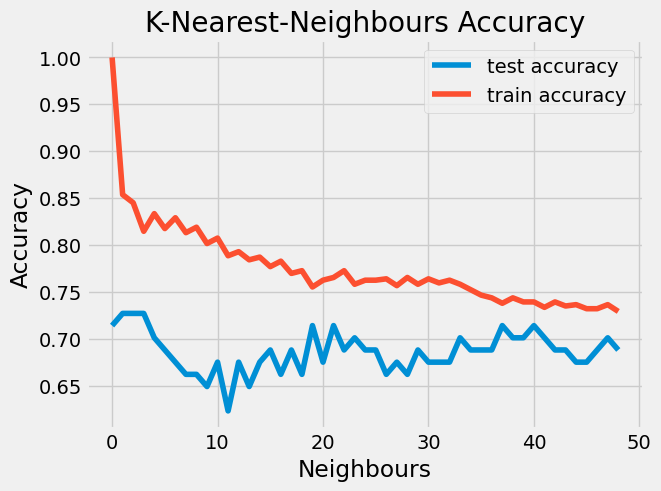

In [17]:
fig, ax = plt.subplots()
ax.plot(test_acc)
ax.plot(train_acc)
ax.legend(["test accuracy", "train accuracy"])
ax.set_title("K-Nearest-Neighbours Accuracy")
ax.set_xlabel("Neighbours")
ax.set_ylabel("Accuracy")
plt.show()

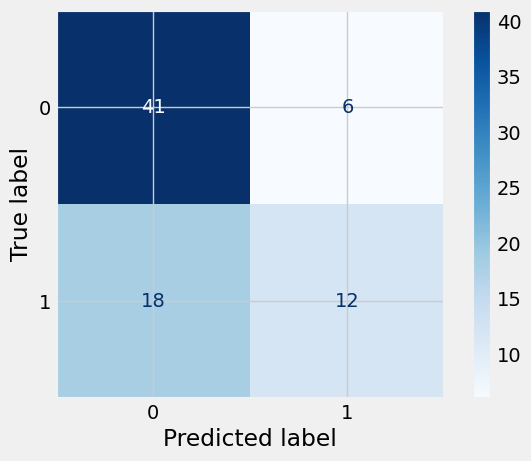

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        47
           1       0.67      0.40      0.50        30

    accuracy                           0.69        77
   macro avg       0.68      0.64      0.64        77
weighted avg       0.68      0.69      0.67        77



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده می شود روش KNN حداکثر دقت 0.69 را دارد و چندان مناسب نمی باشد.
</font>
</p>

### $\color{deepskyblue}{\text{Decision Tree}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

</font>
</p>

In [20]:
from sklearn.metrics import accuracy_score
from sklearn import tree
train_acc = []
test_acc = []
best = 0
best_index = 1
for i in range(1, 50):
    dt = tree.DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test)))
    if (best < test_acc[-1]):
        best_index, best = i, test_acc[-1]
print(best_index)
print(best)

2
0.8441558441558441


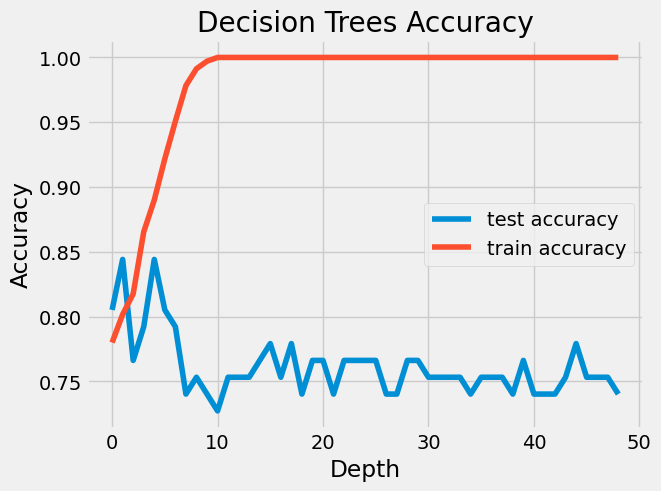

In [21]:
fig, ax = plt.subplots()
ax.plot(test_acc)
ax.plot(train_acc)
ax.legend(["test accuracy", "train accuracy"])
ax.set_title("Decision Trees Accuracy")
ax.set_xlabel("Depth")
ax.set_ylabel("Accuracy")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
from sklearn import tree
train_acc = []
test_acc = []
best = 0
best_index = 1
for i in range(1, 50):
    dt = tree.DecisionTreeClassifier(min_samples_leaf = i)
    dt.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test)))
    if (best < test_acc[-1]):
        best_index, best = i, test_acc[-1]
print(best_index)
print(best)

17
0.8311688311688312


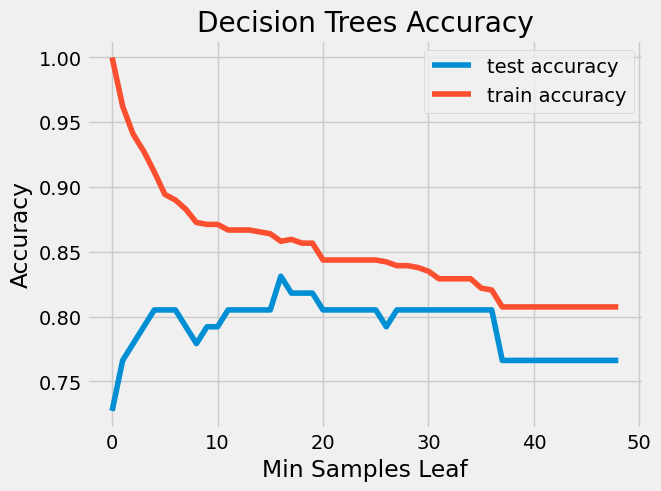

In [23]:
fig, ax = plt.subplots()
ax.plot(test_acc)
ax.plot(train_acc)
ax.legend(["test accuracy", "train accuracy"])
ax.set_title("Decision Trees Accuracy")
ax.set_xlabel("Min Samples Leaf")
ax.set_ylabel("Accuracy")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.72      0.70      0.71        30

    accuracy                           0.78        77
   macro avg       0.77      0.76      0.77        77
weighted avg       0.78      0.78      0.78        77



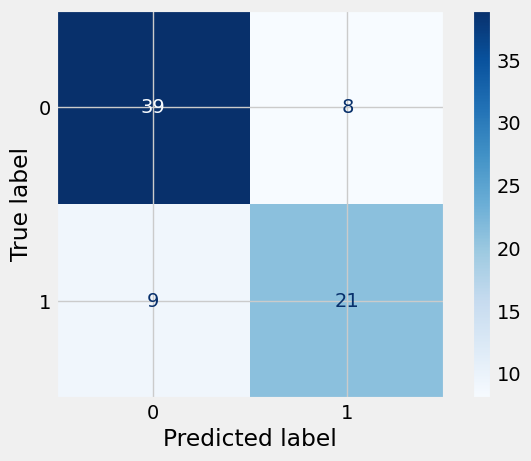

In [36]:
from sklearn.model_selection import GridSearchCV
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': range(1,50)},{'min_samples_leaf': range(1,50)}]
clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=5)
clf = clf.fit(X_train, y_train)
train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, clf.predict(X_test)))

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای درخت تصمیم 2 پارامتر مهم Depth و Min Samples Leaf وجود دارد که به تغییرات دقت نهایی را به ازای مقادیر متفاوت آنها بررسی کردیم. در نهایت نیز با GridSearchCV بهترین پارامتر ها را یافتیم. دقت این روش به طور کلی 0.8 می باشد که از روش قبل بهتر است.
</p>

### $\color{deepskyblue}{\text{Logistic Regression}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

</font>
</p>

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.75      0.60      0.67        30

    accuracy                           0.77        77
   macro avg       0.76      0.74      0.74        77
weighted avg       0.76      0.77      0.76        77



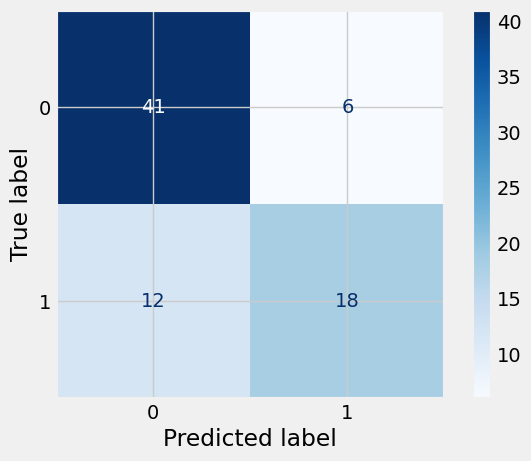

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg = logreg.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, logreg.predict(X_test)))

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این روش نیز نهایتا به دقت 0.77 رسیدیم.
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در انتهای این بخش درباره underfitting و overfitting اطلاعاتی را ارائه می دهیم.
<ul dir =rtl>
<ul>
<li><p style="color:red;">overfitting</p></li>
منظور از آن فیت شدن بیش از حد داده بر روی مدل train است به صورتی که برای پیش بینی بر روی مدل test دچار بایاس شویم و توانایی پیش بینی صحیح ما کمتر شود. به عبارت دیگر مدل ما نویز ها را هم مدل می کند و مدل ما تنها فیچر ها را حفظ می کند و قدرت جنرالیزه شدن ندارد.
<li><p style="color:red;">underfitting</p></li>
در این حالت به دلایل مختلف مانند کم بودن داده train یا انتخاب نامناسب هایپر پارامتر ها توانایی مدل سازی مناسب را نداریم و مدل ما آموزش نمی بیند و توانایی پیش بینی صحیح را نیز نداریم و دقت ما کم است.
</ul>
</font>
</p>

## $\color{deepskyblue}{\text{Random Forest}}$
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<ul dir =rtl>
<ul>
<li>max_depth</li>
 این متغیر حداکثر ارتفاع هر درخت در جنگل را مشخص می‌کند افزایش این متغیر باعث میشود مدل ما بیشتر با داده‌ی train فیت شود در نتیجه محدود کردن آن باعث کمتر شدن واریانس و افزایش بایاس می‌شود.
<li>leaf_samples_min</li>
فرض کنید این متغیر برابر x باشد، در این حالت هر جا که اسپلیت کردن یک راس به کمتر از ۱۰ برگ برسد، اسپلیت کردن این راس متوقف می‌شود. تاثیر این متغیر نیز مانند متغیر بالاست، با این تفاوت که افزایش آن باعث کمتر فیت شدن درخت با داده ی ترین می‌شود و باعث واریانس کمتر و بایاس بیشتر می‌شود.
<li>n_estimators</li>
این متغیر برابر درخت های داخل جنگل است. افزایش این متغیر باعث افزایش محاسبات و کندی برنامه می‌شود
افزایش این متغیر همیشه نتیجه را بهبود نمی‌بخشد چرا که افزایش بیش از حد آن ممکن است باعث شود درخت ها به هم وابستگی پیدا کنند که این اتفاق باعث کاهش دقت می‌شود. 
<li>bootstrap</li> این متغیر برای تخمین مقادیر آماری از نمونه ها استفاده می شود. اگر از این روش استفاده شود چند مدل برای یک داده train استفاده می شود و در غیر این صورت تمام دیتاست برای ساخت درخت ها استفاده می شود.
</font>
</p>

In [26]:
from sklearn.ensemble import RandomForestClassifier
train_acc = []
test_acc = []
best = 0
best_index = 1
for i in range(1, 50):
    clf = RandomForestClassifier(n_estimators = 300, max_depth = i, min_samples_leaf = 13);
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    if (best < test_acc[-1]):
        best_index, best = i, test_acc[-1]
print(best_index)
print(best)

2
0.8311688311688312


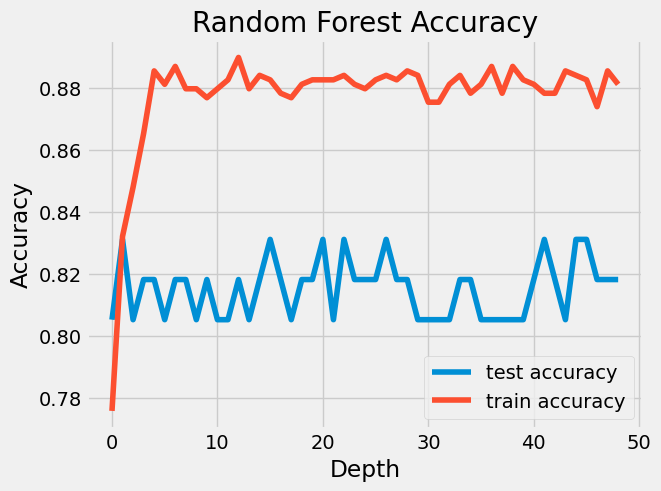

In [27]:
fig, ax = plt.subplots()
ax.plot(test_acc)
ax.plot(train_acc)
ax.legend(["test accuracy", "train accuracy"])
ax.set_title("Random Forest Accuracy")
ax.set_xlabel("Depth")
ax.set_ylabel("Accuracy")
plt.show()

In [28]:
train_acc = []
test_acc = []
best = 0
best_index = 1
for i in range(1, 50):
    clf = RandomForestClassifier(n_estimators = 300, max_depth = 3, min_samples_leaf = i);
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    if (best < test_acc[-1]):
        best_index, best = i, test_acc[-1]
print(best_index)
print(best)

15
0.8441558441558441


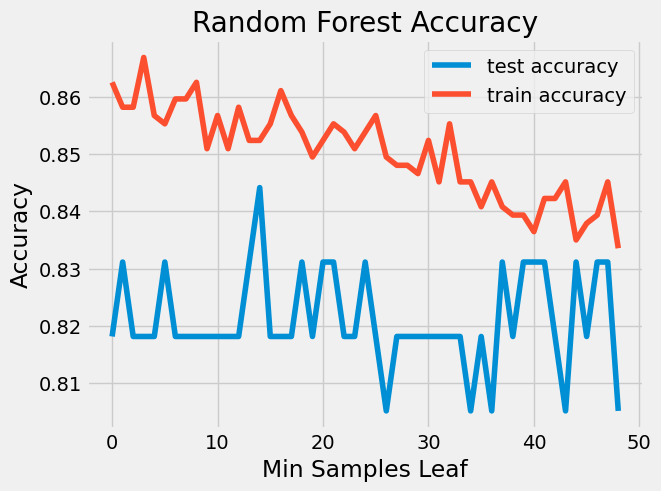

In [29]:
fig, ax = plt.subplots()
ax.plot(test_acc)
ax.plot(train_acc)
ax.legend(["test accuracy", "train accuracy"])
ax.set_title("Random Forest Accuracy")
ax.set_xlabel("Min Samples Leaf")
ax.set_ylabel("Accuracy")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.74      0.77      0.75        30

    accuracy                           0.81        77
   macro avg       0.79      0.80      0.80        77
weighted avg       0.81      0.81      0.81        77



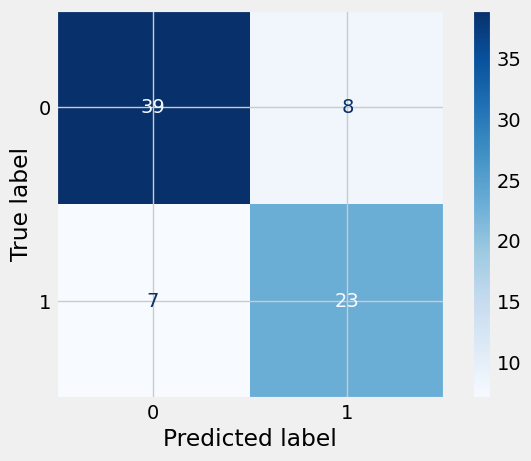

In [30]:
tree_param = [{"n_estimators" : [200], 'criterion': ['entropy', 'gini'], 'max_depth': range(1,70)},{'min_samples_leaf': range(1,70)}]
clf = GridSearchCV(RandomForestClassifier(), tree_param, cv=5)
clf = clf.fit(X_train, y_train)
train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, clf.predict(X_test)))

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده می شود در نهایت به دقت 0.81 رسیدیم که بالاترین دقت ما می باشد.
<ul dir =rtl>
<ul>
<li>اگر پیش بینی ما به طور سیستماتیک بالاتر یا پایین تر از متغیر هدف پیش بینی کند دچار بایاس هستیم.</li>

<li>واریانس نیز به صورت کلی نشان دهنده جنرال و قابل تعمیم بودن مدل ما می باشد</li>
<li>به صورت ایده آل می خواهیم که واریانس پایین و بایاس پایین داشته باشیم.</li>

<li>به صورت کلی یک درخت تصمیم واریانس بالاتر اما بایاس بسیار کمی دارد.</li> 
</font>
</p>